In [679]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### MNIST dataset

In [680]:
# Function to one-hot encode the target variable into the 10 classes (0-9)
# Input shape: (N,),    Output: (N, 10)
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [681]:
# Loading the MNIST dataset
train_data=pd.read_csv(r"./mnist_train.csv")
test_data=pd.read_csv(r"./mnist_test.csv")

# Preprocessing the data
train_data=train_data.to_numpy()    # train_data shape: (60000, 785)
test_data=test_data.to_numpy()      # test_data shape: (10000, 785)

X_train=train_data[:,1:]            # X_train shape: (60000, 784)
y_train=train_data[:,0]             # y_train shape: (60000,)
X_test=test_data[:,1:]              # X_test shape: (10000, 784)
y_test=test_data[:,0]               # y_test shape: (10000,)

X_train = X_train / 255.0           # Normalizing the data
X_test = X_test / 255.0

one_hot_y_train = one_hot(y_train)  # one_hot_y_train shape: (60000, 10)
one_hot_y_test = one_hot(y_test)    # one_hot_y_test shape: (10000, 10)

In [682]:
y_train = y_train.reshape(-1, 1)

In [683]:
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], shape=(60000, 1))

#### Training on the other Boolean functions

In [684]:
x_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

In [685]:
x_palindrome = []
for i in [0, 1]:
    for j in [0, 1]:
        for k in [0, 1]:
            for l in [0, 1]:
                for m in [0, 1]:
                    x_palindrome.append([i, j, k, l, m])

y_palindrome = []
for ele in x_palindrome:
    if (ele == ele[::-1]):
        y_palindrome.append(1)
    else:
        y_palindrome.append(0)

x_palindrome = np.array(x_palindrome)
y_palindrome = np.array(y_palindrome)

In [686]:
x_majority = []
for i in [0, 1]:
    for j in [0, 1]:
        for k in [0, 1]:
            for l in [0, 1]:
                for m in [0, 1]:
                    x_majority.append([i, j, k, l, m])

y_majority = []
for ele in x_majority:
    count = 0
    for i in ele:
        if i == 1:
            count += 1
    if count > 2:
        y_majority.append(1)
    else:
        y_majority.append(0)

In [687]:
x_even = []

for i in [0, 1]:
    for j in [0, 1]:
        for k in [0, 1]:
            for l in [0, 1]:
                for m in [0, 1]:
                    x_even.append([i, j, k, l, m])

y_even = []
for ele in x_even:
    count = 0
    for i in ele:
        if i == 1:
            count += 1
    if count % 2 == 0:
        y_even.append(1)
    else:
        y_even.append(0)

x_even = np.array(x_even)
y_even = np.array(y_even)

In [688]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [689]:
def softmax(Z):
    eZ = np.exp(Z)
    eZ = eZ / np.sum(eZ)
    return eZ

In [690]:
def architecture(layers, Nl):
    W = {}
    B = {}
    W0 = np.random.random((Nl[0], Nl[1]))
    W1 = np.random.random((Nl[1], Nl[2]))
    W2 = np.random.random((Nl[2], Nl[3]))
    B0 = np.random.random((1, Nl[1]))
    B1 = np.random.random((1, Nl[2]))
    B2 = np.random.random((1, Nl[3]))

    W["W0"] = W0
    W["W1"] = W1
    W["W2"] = W2
    B["B0"] = B0
    B["B1"] = B1
    B["B2"] = B2
    
    return W, B

In [691]:
def forwardProp(X, W, B):
    outputs = {}
    Z0 = np.dot(X, W["W0"]) + B["B0"]
    A0 = sigmoid(Z0)
    Z1 = np.dot(A0, W["W1"]) + B["B1"]
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W["W2"]) + B["B2"]
    A2 = sigmoid(Z2)
    outputs["A0"] = A0
    outputs["A1"] = A1
    outputs["A2"] = A2
    return outputs

In [692]:
def forwardPropMNIST(X, W, B):
    outputs = {}
    Z0 = np.dot(X, W["W0"]) + B["B0"]
    A0 = sigmoid(Z0)
    Z1 = np.dot(A0, W["W1"]) + B["B1"]
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W["W2"]) + B["B2"]
    A2 = softmax(Z2)
    print(A2)
    outputs["A0"] = A0
    outputs["A1"] = A1
    outputs["A2"] = A2
    return outputs

In [693]:
def backProp(X, W, B, Y, lr):
    
    for i in range(1000):

        outputs = forwardProp(X, W, B)
        
        error2 = outputs["A2"] - Y.reshape(X.shape[0],1)
        error2_ce = Y * np.log(outputs["A2"]) + (1 - Y) * np.log(1 - outputs["A2"])
        
        errors.append(1 / (X.shape[0] * X.shape[0]) * np.sum(error2**2))
        ce_errors.append(- 1 / (X.shape[0] * X.shape[0]) * np.sum(error2_ce))
        
        A0 = outputs["A0"]
        A1 = outputs["A1"]
        A2 = outputs["A2"]
        
        dw2 = np.dot(A2.T, error2)
        db2 = np.sum(error2, axis = 0)
    
        error1 = np.dot(error2, W["W2"].T)
        dw1 = np.dot(A1.T, error1)
        db1 = np.sum(error1, axis = 0)
    
        error0 = np.dot(error1, W["W1"].T)
        dw0 = np.dot(A0.T, error0)
        db0 = np.sum(error0, axis = 0)
        
        
        W["W2"] -= dw2*lr
        B["B2"] -= db2*lr
        W["W1"] -= dw1*lr
        B["B1"] -= db1*lr
        W["W0"] -= dw0*lr
        B["B0"] -= db0*lr

    return W, B

In [694]:
errors = []
ce_errors = []
W, B = architecture(4, [2, 2, 2, 1])
w, b = backProp(x_xor, W, B, y_xor, 0.01)

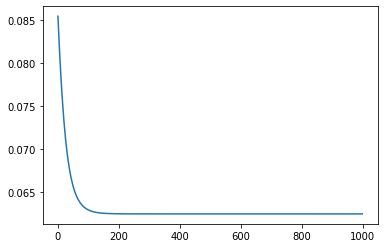

In [695]:
plt.plot(errors)

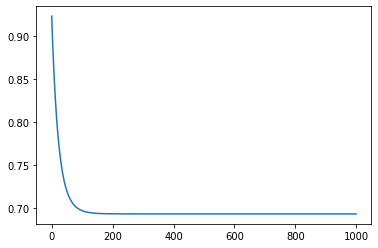

In [696]:
plt.plot(ce_errors)

In [697]:
errors = []
ce_errors = []
W, B = architecture(4, [5, 5, 5, 1])
w, b = backProp(x_palindrome, W, B, y_palindrome, 0.001)

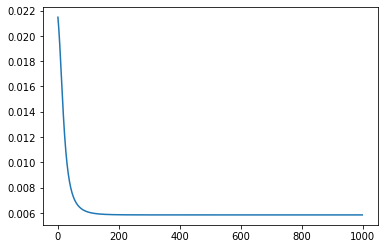

In [698]:
plt.plot(errors)

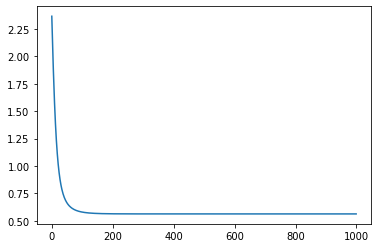

In [699]:
plt.plot(ce_errors)

In [700]:
errors = []
ce_errors = []
W, B = architecture(4, [5, 5, 5, 1])
w, b = backProp(x_even, W, B, y_even, 0.0005)

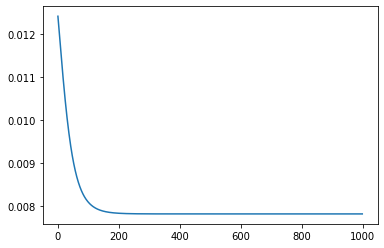

In [701]:
plt.plot(errors)

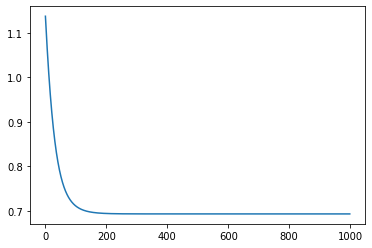

In [702]:
plt.plot(ce_errors)

In [703]:
# errors = []
# ce_errors = []

In [704]:
# W, B = architecture(4, [784, 784, 784, 10])
# w, b = backProp(X_train, W, B, y_train, 0.001)

In [705]:
# plt.plot(errors)